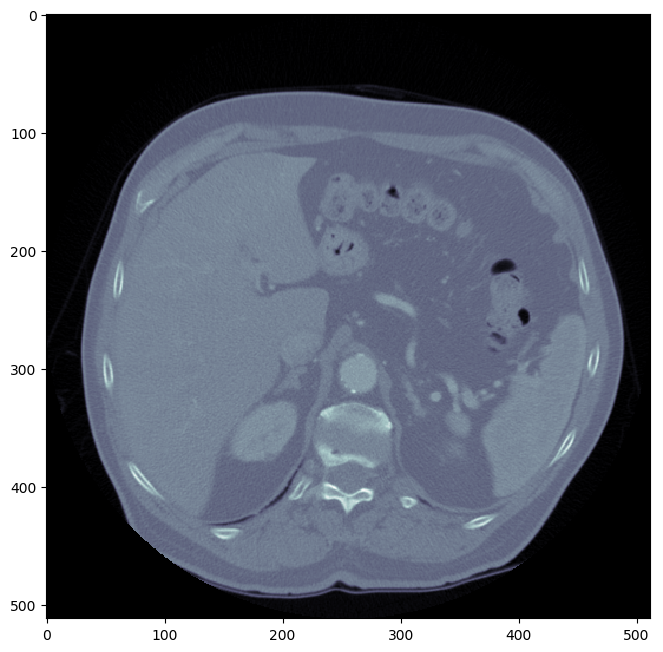

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pydicom
import scipy.misc
import numpy as np
%matplotlib inline

# Any results you write to the current directory are saved as output.
lung = pydicom.read_file('c:/temp/000074.dcm')

# convert to HounsField Scale
image = np.stack(lung.pixel_array)

# Convert to int16 (from sometimes int16), 
# should be possible as values should always be low enough (<32k)
image = image.astype(np.int16)

# Set outside-of-scan pixels to 1
# The intercept is usually -1024, so air is approximately 0
image[image == -2000] = 0
#image[(image<-500)|(image>500)] = 0

intercept = lung.RescaleIntercept
slope = lung.RescaleSlope
    
if slope != 1:
	image = slope * image.astype(np.float64)
	image = image.astype(np.int16)
        
image += np.int16(intercept)
    
imgs = np.array(image, dtype=np.float64)

plt.figure(figsize = (8,8), dpi=100)
plt.imshow(imgs, cmap=plt.cm.bone)
#plt.hist(imgs, bins=20)
plt.show()

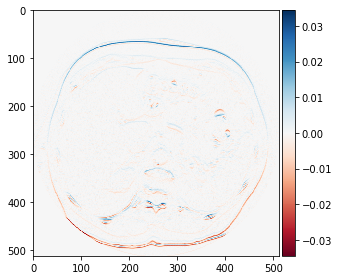

In [4]:
from skimage import data, io, filters

edges = filters.sobel_h(image)
io.imshow(edges)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


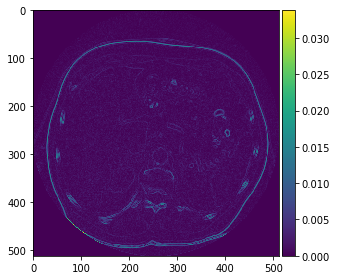

In [3]:
edges = filters.roberts(image)
io.imshow(edges)

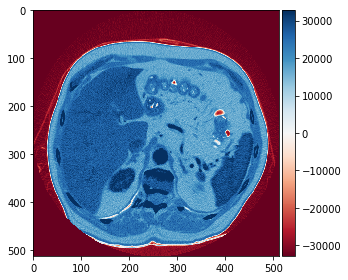

In [5]:
from skimage import exposure

p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
io.imshow(img_rescale)

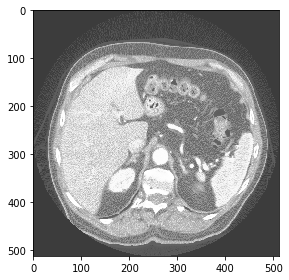

In [6]:
# Equalization
img_eq = exposure.equalize_hist(image)
io.imshow(img_eq)


c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from int16 to uint16
  .format(dtypeobj_in, dtypeobj_out))


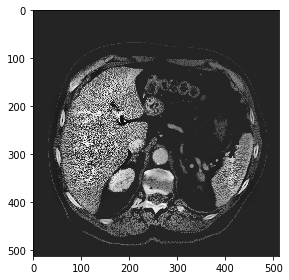

In [7]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.15)
io.imshow(img_adapteq)

In [9]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)


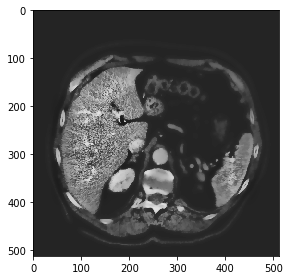

In [10]:
io.imshow(denoise_tv_chambolle(img_adapteq, weight=0.1, multichannel=False))

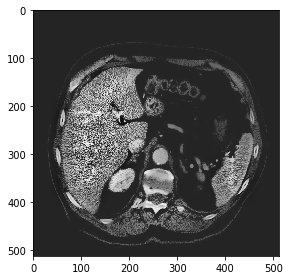

In [11]:
io.imshow(denoise_wavelet(img_adapteq, multichannel=False))

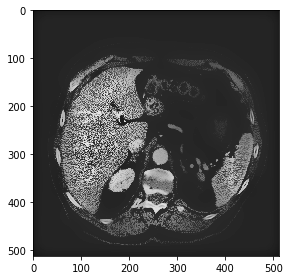

In [12]:
io.imshow(denoise_bilateral(img_adapteq, sigma_color=0.1, sigma_spatial=15,
                multichannel=False))

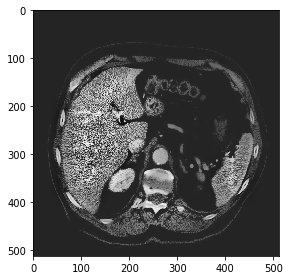

In [13]:
io.imshow(denoise_wavelet(img_adapteq, multichannel=False, convert2ycbcr=True))